In [2]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import gmaps

from citipy import citipy
from datetime import datetime
from scipy import stats
from scipy.stats import linregress

from config import weather_api_key
from config import g_key

# Get the start time for computation.
start = time.time()

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80026ba215c9965e6260663fff8da556


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(f"There are {len(cities)} cities in the list.")

There are 627 cities in the list.


In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ntungamo
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | grand forks
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | seydi
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | yambio
Processing Record 15 of Set 1 | mount gambier
Processing Record 16 of Set 1 | pacasmayo
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | vestmannaeyjar
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | keti bandar
Processing Record 22 of Set 1 | tumannyy
Cit

Processing Record 34 of Set 4 | shimoda
Processing Record 35 of Set 4 | corrente
Processing Record 36 of Set 4 | labuhan
Processing Record 37 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 4 | kadhan
Processing Record 39 of Set 4 | yeniseysk
Processing Record 40 of Set 4 | christiana
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | chabahar
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | ozark
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | aripuana
Processing Record 1 of Set 5 | watsa
Processing Record 2 of Set 5 | puerto carreno
Processing Record 3 of Set 5 | payakumbuh
Processing Record 4 of Set 5 | tres arroyos
Processing Record 5 of Set 5 | igaracu do tiete
Processing Record 6 of S

Processing Record 23 of Set 8 | vila franca do campo
Processing Record 24 of Set 8 | aksarka
Processing Record 25 of Set 8 | yar-sale
Processing Record 26 of Set 8 | bereda
Processing Record 27 of Set 8 | asfi
Processing Record 28 of Set 8 | saldanha
Processing Record 29 of Set 8 | komsomolskiy
Processing Record 30 of Set 8 | narsaq
Processing Record 31 of Set 8 | los llanos de aridane
Processing Record 32 of Set 8 | kashi
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | kutum
Processing Record 36 of Set 8 | caravelas
Processing Record 37 of Set 8 | mwinilunga
Processing Record 38 of Set 8 | serebryanyy bor
Processing Record 39 of Set 8 | sabla
Processing Record 40 of Set 8 | zhashkiv
Processing Record 41 of Set 8 | wewak
Processing Record 42 of Set 8 | una
Processing Record 43 of Set 8 | lhuntshi
City not found. Skipping...
Processing Record 44 of Set 8 | coka
Processing Record 45 of Set 8 | lipin bor
Processing Record 46 

Processing Record 8 of Set 12 | sept-iles
Processing Record 9 of Set 12 | da nang
Processing Record 10 of Set 12 | senno
Processing Record 11 of Set 12 | bontang
Processing Record 12 of Set 12 | iqaluit
Processing Record 13 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 14 of Set 12 | srednekolymsk
Processing Record 15 of Set 12 | bara
Processing Record 16 of Set 12 | sola
Processing Record 17 of Set 12 | tezu
Processing Record 18 of Set 12 | egvekinot
Processing Record 19 of Set 12 | nanakuli
Processing Record 20 of Set 12 | valkeala
Processing Record 21 of Set 12 | dmitriyevka
Processing Record 22 of Set 12 | qui nhon
Processing Record 23 of Set 12 | port-gentil
Processing Record 24 of Set 12 | bama
Processing Record 25 of Set 12 | praia
Processing Record 26 of Set 12 | prainha
Processing Record 27 of Set 12 | vestmanna
Processing Record 28 of Set 12 | sault sainte marie
Processing Record 29 of Set 12 | amalapuram
Processing Record 30 of Set 12 | malinovskiy

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame and reorder the columns.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-04-08 02:30:55,22.0752,-159.3190,82.38,72,75,19.57
1,Pevek,RU,2022-04-08 02:30:56,69.7008,170.3133,-2.02,82,94,9.13
2,Busselton,AU,2022-04-08 02:30:56,-33.6500,115.3333,70.32,78,99,13.65
3,Pangnirtung,CA,2022-04-08 02:30:48,66.1451,-65.7125,12.52,95,99,4.00
4,Dikson,RU,2022-04-08 02:30:56,73.5069,80.5464,5.58,94,100,11.34
5,Fort-Shevchenko,KZ,2022-04-08 02:30:57,44.5086,50.2630,51.71,76,100,14.00
6,Maniitsoq,GL,2022-04-08 02:30:57,65.4167,-52.9000,16.97,90,67,7.63
7,Bethel,US,2022-04-08 02:30:57,41.3712,-73.4140,50.09,91,100,16.11
8,Ribeira Grande,PT,2022-04-08 02:30:58,38.5167,-28.7000,60.87,85,96,14.52
9,Khatanga,RU,2022-04-08 02:30:58,71.9667,102.5000,10.67,90,100,9.84


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

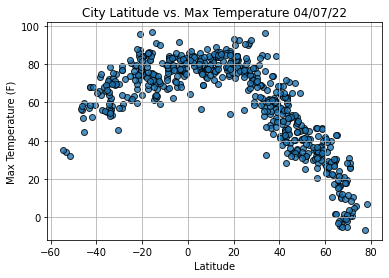

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


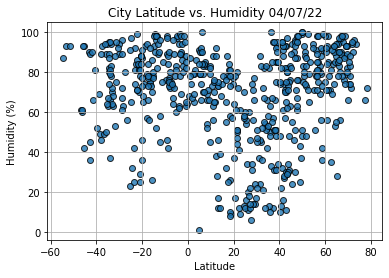

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

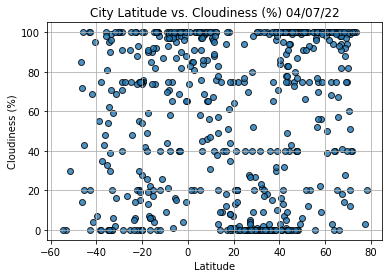

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

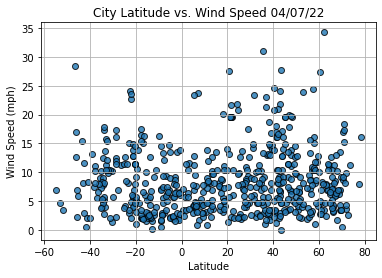

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [13]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(label=title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-04-08 02:30:59
Lat                         -21.2
Lng                        -175.2
Max Temp                    84.36
Humidity                       84
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [15]:
city_data_df["Lat"] >=0

0       True
1       True
2      False
3       True
4       True
       ...  
575     True
576     True
577    False
578    False
579     True
Name: Lat, Length: 580, dtype: bool

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-04-08 02:30:55,22.0752,-159.3190,82.38,72,75,19.57
1,Pevek,RU,2022-04-08 02:30:56,69.7008,170.3133,-2.02,82,94,9.13
3,Pangnirtung,CA,2022-04-08 02:30:48,66.1451,-65.7125,12.52,95,99,4.00
4,Dikson,RU,2022-04-08 02:30:56,73.5069,80.5464,5.58,94,100,11.34
5,Fort-Shevchenko,KZ,2022-04-08 02:30:57,44.5086,50.2630,51.71,76,100,14.00


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

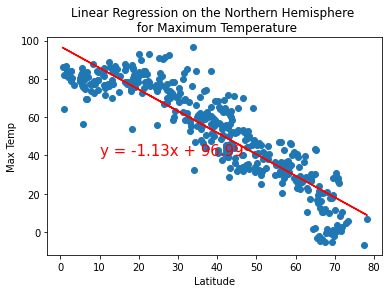

<Figure size 432x288 with 0 Axes>

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (10,40))


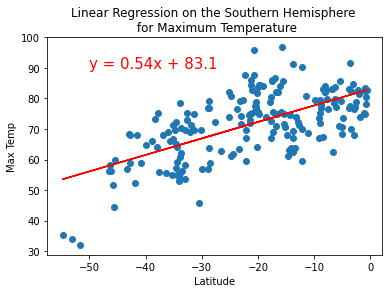

<Figure size 432x288 with 0 Axes>

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       'Max Temp',
                       (-50,90))


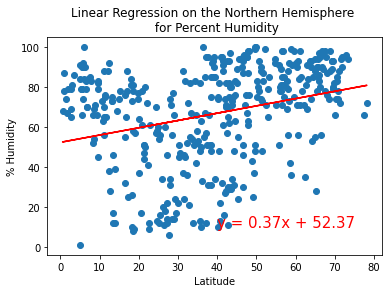

<Figure size 432x288 with 0 Axes>

In [20]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Humidity',
                       '% Humidity',
                       (40,10))


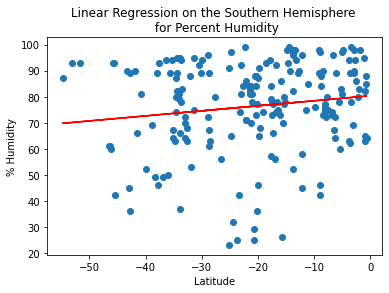

<Figure size 432x288 with 0 Axes>

In [21]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Humidity',
                       '% Humidity',
                       (-50,15))


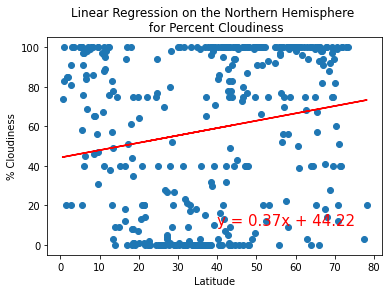

<Figure size 432x288 with 0 Axes>

In [22]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Cloudiness',
                       '% Cloudiness',
                       (40,10))


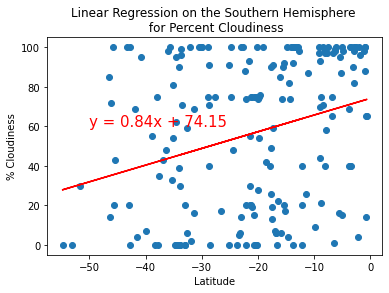

<Figure size 432x288 with 0 Axes>

In [23]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Cloudiness',
                       '% Cloudiness',
                       (-50,60))


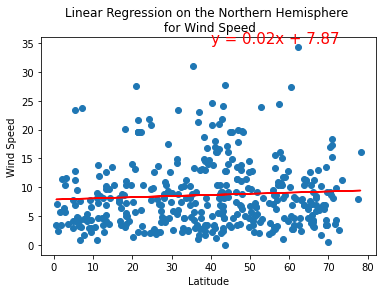

<Figure size 432x288 with 0 Axes>

In [24]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (40,35))


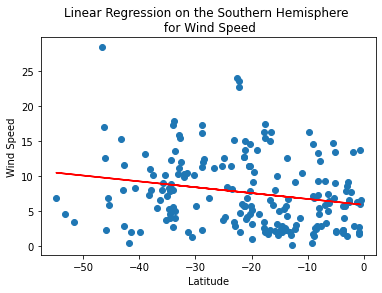

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-50,35))


In [26]:
# Display total computational time.
end = time.time()
total_time = end - start
seconds = total_time % 3600
minutes = seconds // 60
seconds %= 60
print(f"Total time elapsed = {minutes:.0f} minutes {seconds:.0f} seconds")

Total time elapsed = 2 minutes 53 seconds
